In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn import metrics

In [6]:
#DATA COLLECTION AND PROCESSING
gold_data = pd.read_csv('gld_price_data.csv')

In [10]:
#Top 5 data
gold_data.head()

,Date,SPX,GLD,USO,SLV,EUR/USD
0,1/2/2008,1447.160034,84.860001,78.470001,15.180,1.471692
1,1/3/2008,1447.160034,85.570000,78.370003,15.285,1.474491
2,1/4/2008,1411.630005,85.129997,77.309998,15.167,1.475492
3,1/7/2008,1416.180054,84.769997,75.500000,15.053,1.468299
4,1/8/2008,1390.189941,86.779999,76.059998,15.590,1.557099


In [11]:
#last 5 row data
gold_data.tail()

,Date,SPX,GLD,USO,SLV,EUR/USD
2285,5/8/2018,2671.919922,124.589996,14.0600,15.5100,1.186789
2286,5/9/2018,2697.790039,124.330002,14.3700,15.5300,1.184722
2287,5/10/2018,2723.070068,125.180000,14.4100,15.7400,1.191753
2288,5/14/2018,2730.129883,124.489998,14.3800,15.5600,1.193118
2289,5/16/2018,2725.780029,122.543800,14.4058,15.4542,1.182033


In [12]:
#number of rows and column
gold_data.shape

(2290, 6)

In [13]:
#more info about data
gold_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2290 entries, 0 to 2289
Data columns (total 6 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Date     2290 non-null   object 
 1   SPX      2290 non-null   float64
 2   GLD      2290 non-null   float64
 3   USO      2290 non-null   float64
 4   SLV      2290 non-null   float64
 5   EUR/USD  2290 non-null   float64
dtypes: float64(5), object(1)
memory usage: 107.5+ KB


In [14]:
#checking number of missing value
gold_data.isnull().sum()

Date       0
SPX        0
GLD        0
USO        0
SLV        0
EUR/USD    0
dtype: int64

In [15]:
#getting the statistical measure of the data
gold_data.describe()

,SPX,GLD,USO,SLV,EUR/USD
count,2290.000000,2290.000000,2290.000000,2290.000000,2290.000000
mean,1654.315776,122.732875,31.842221,20.084997,1.283653
std,519.111540,23.283346,19.523517,7.092566,0.131547
min,676.530029,70.000000,7.960000,8.850000,1.039047
25%,1239.874969,109.725000,14.380000,15.570000,1.171313
50%,1551.434998,120.580002,33.869999,17.268500,1.303297
75%,2073.010070,132.840004,37.827501,22.882500,1.369971
max,2872.870117,184.589996,117.480003,47.259998,1.598798


In [19]:
gold_data['Date'] = pd.to_datetime(gold_data['Date'])

# Option 1: Drop non-numeric columns before calculating correlation
numeric_columns = gold_data.select_dtypes(include=['float64', 'int64']).columns
correlation = gold_data[numeric_columns].corr()


<Axes: >

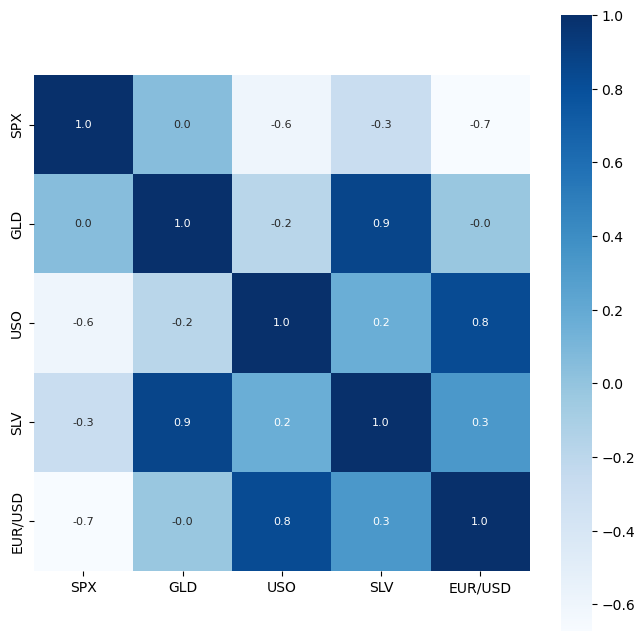

In [22]:
#constructing heatmap to understand the correlation
plt.figure(figsize= (8,8))
sns.heatmap(correlation , cbar = True, square=True,fmt='.1F', annot = True,annot_kws={'size':8},cmap='Blues')

In [23]:
#correlation value of GLD
print(correlation['GLD'])

SPX        0.049345
GLD        1.000000
USO       -0.186360
SLV        0.866632
EUR/USD   -0.024375
Name: GLD, dtype: float64


C:\Users\91626\AppData\Local\Temp\ipykernel_14316\3154182865.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(gold_data['GLD'], color = 'pink')


<Axes: xlabel='GLD', ylabel='Density'>

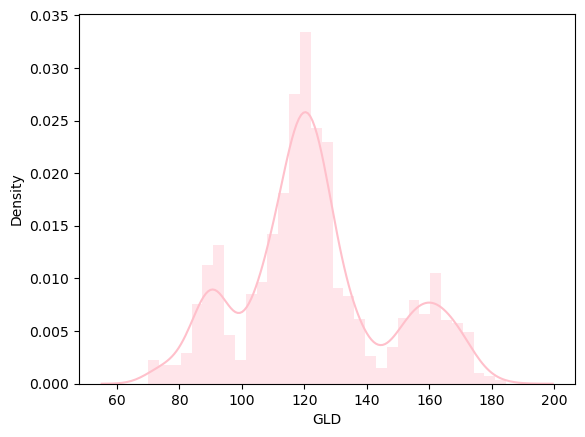

In [24]:
#checking the distribution of the GLD Price
sns.distplot(gold_data['GLD'], color = 'pink')

In [33]:
#splitting the features and target
X = gold_data.drop(['Date' , 'GLD'],axis=1)
Y = gold_data['GLD']

In [34]:
print(X)

              SPX        USO      SLV   EUR/USD
0     1447.160034  78.470001  15.1800  1.471692
1     1447.160034  78.370003  15.2850  1.474491
2     1411.630005  77.309998  15.1670  1.475492
3     1416.180054  75.500000  15.0530  1.468299
4     1390.189941  76.059998  15.5900  1.557099
...           ...        ...      ...       ...
2285  2671.919922  14.060000  15.5100  1.186789
2286  2697.790039  14.370000  15.5300  1.184722
2287  2723.070068  14.410000  15.7400  1.191753
2288  2730.129883  14.380000  15.5600  1.193118
2289  2725.780029  14.405800  15.4542  1.182033

[2290 rows x 4 columns]


In [35]:
print(Y)

0        84.860001
1        85.570000
2        85.129997
3        84.769997
4        86.779999
           ...    
2285    124.589996
2286    124.330002
2287    125.180000
2288    124.489998
2289    122.543800
Name: GLD, Length: 2290, dtype: float64


In [58]:
from sklearn.model_selection import train_test_split
X_train,X_test,Y_train, Y_test = train_test_split(X, Y, test_size = 0.2 , random_state = 42)


In [60]:
#model training : random forest regressor
regressor = RandomForestRegressor(n_estimators = 100)


In [61]:
regressor.fit(X_train,Y_train)

RandomForestRegressor()

In [62]:
#model evaluation
#pridiction on test data
test_data_prediction = regressor.predict(X_test)
print(test_data_prediction)

[122.54379984 131.08570301 127.68509999  96.64039763 119.02320065
 114.56439919 124.88280121 117.65179952 108.04380083  98.31579951
  95.44179966 166.78029915 150.09360158 115.85640038 170.74690117
  85.14659949 123.00069862 109.13959692 113.40910087 131.82790291
 124.24529889 113.73350054 115.78930032 108.81099959 108.44220154
 125.77209929 119.18029955 112.40679944 113.43080124 125.30919906
 146.32240163  89.41530016 167.63389936 113.92339925 108.464601
 120.33740111 141.6407985  161.3775013  173.6698977  153.10430181
 119.63610127 113.2429008  121.35259956 113.59519904 121.93749984
 108.03270071  88.42919892 114.48209931 129.84270206 117.81700138
 103.70480013 130.0112024  107.04429863 160.41310306 132.36039952
 118.83459983 147.16700096 135.23450225  95.57800144 124.62590183
 115.27079831  86.08560116 104.22199897 113.9766008   84.18219922
 122.31630023 116.52649923 113.64540198 165.50920359  92.23439982
  80.1832008  160.9914015  158.00950172 106.05140008 149.55410176
 109.5291970

In [63]:
#R squared error
error_score = metrics.r2_score(Y_test , test_data_prediction)
print ('R_squared error : ', error_score)

R_squared error :  0.9901586869513523


In [64]:
#compare the actual value and predicted value i n a plot
Y_test  = list(Y_test)

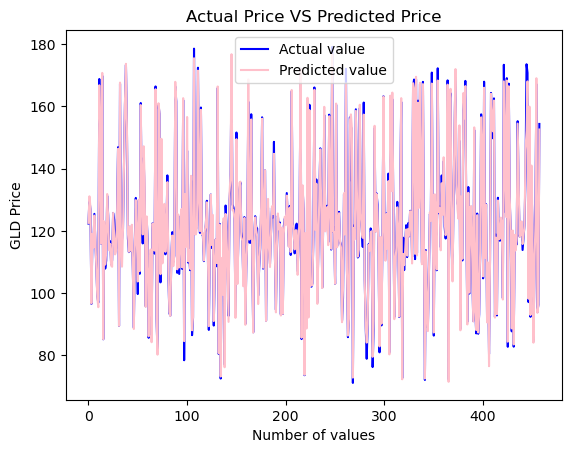

In [65]:
plt.plot(Y_test, color = 'blue' , label ='Actual value')
plt.plot(test_data_prediction, color = 'pink' , label = 'Predicted value')
plt.title('Actual Price VS Predicted Price')
plt.xlabel('Number of values')
plt.ylabel('GLD Price')
plt.legend()
plt.show()